In [ ]:
##DECOMPOSITION of video frames 14/03/2021
import sys
import shutil

import numpy as np
from math import floor
import pandas as pd
import numpy as np
import cv2

import os
import time
from PIL import Image
import math

# command line arguments --> file name, video_file_name, gpu or cpu 


# first decompose the video to frames
# place the video to be detected into the directory


#video = sys.argv[1]
#pred_text_file_name = sys.argv[2]

# resize image
#output = cv2.resize(src, dsize)


start = time.time()
text_file = 'frames.txt'

print('decomposing video to frames this may take a while  for large videos :) .....')
frames_path = 'video_frames/'
os.makedirs('video_frames/', exist_ok=True)
#os.makedirs('predictions/', exist_ok=True)

f = open(text_file, 'w+')
# Opens the Video file
cap= cv2.VideoCapture('/content/NAD57.mpg')
i=1
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    scale_percent = 25

#calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)

# dsize
    dsize = (width, height)

    output = cv2.resize(frame, dsize) 
    frame_path = frames_path + 'frame_' + str(i) + '.jpg'
    cv2.imwrite("/content/video_frames/frame_"+ str(i) + ".jpg", output)
    f.write(frame_path + '\n')
    i+=1

cap.release()
cv2.destroyAllWindows()
print("decomposition complete")

end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

decomposing video to frames this may take a while  for large videos :) .....
decomposition complete
Runtime of the program is 9.736498594284058


Streaming output truncated to the last 5000 lines.
11259
11260
0.9779725175093505
(60, 88, 3)
11260
11261
0.5161970276671879
(60, 88, 3)
11261
11262
0.9350328926250003
(60, 88, 3)
11262
11263
0.9242532418039462
(60, 88, 3)
11263
11264
0.9424240271749291
(60, 88, 3)
11264
11265
0.906844212302857
(60, 88, 3)
11265
11266
0.4215920131946736
(60, 88, 3)
11266
11267
0.9379462599012004
(60, 88, 3)
11267
11268
0.8849048473342432
(60, 88, 3)
11268
11269
0.8914241222080718
(60, 88, 3)
11269
11270
0.9244497170113657
(60, 88, 3)
11270
11271
0.4127104194859847
(60, 88, 3)
11271
11272
0.8586092068581449
(60, 88, 3)
11272
11273
0.9800135191841208
(60, 88, 3)
11273
11274
0.9188577388006833
(60, 88, 3)
11274
11275
0.9110478008773336
(60, 88, 3)
11275
11276
0.5007928365181765
(60, 88, 3)
11276
11277
0.8392103225734096
(60, 88, 3)
11277
11278
0.8377755448337345
(60, 88, 3)
11278
11279
0.8651903598648937
(60, 88, 3)
11279
11280
0.8352585715168698
(60, 88, 3)
11280
11281
0.43484217969822714
(60, 88, 3)
112

No handles with labels found to put in legend.


12509
12510
0.03316584706746094
1.0
[0.0651073  0.0545278  0.06369678 ... 0.00248362 0.00236874 0.00270808]
46
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10277, 10321, 10702, 11086, 11549, 11734]
[ 1331  1545  1840  1923  2064  2113  2217  2307  2549  2646  2797  3093
  3463  3837  4054  5016  5076  5169  6288  6498  6863  7928  8047  8203
  8244  8429  8598  8696  8864  9004  9075  9351  9461  9538  9640  9777
  9872  9959 10167 10267 10277 10321 10702 11086 11549 11734]
['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '10267', 

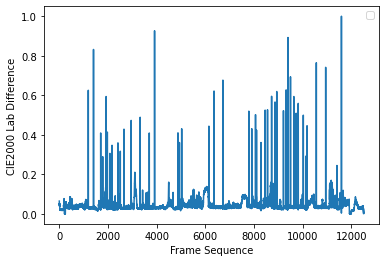

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import time
from matplotlib import pyplot as plt
import numpy as np

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,Lab1.shape[0]):
    for j in range(0,Lab1.shape[1]):
      diff = diff + CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j]))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)





# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




In [ ]:
!pip install scikit-image

In [ ]:
import cv2
import numpy as np
from skimage import color


image1 = cv2.imread("/content/video_frames/frame_100.jpg")
print(image1.shape)

(60, 88, 3)


Streaming output truncated to the last 5000 lines.
11258
11259
0.8126702532885961
(60, 88, 3)
11259
11260
0.7828598579430576
(60, 88, 3)
11260
11261
0.3061968522706624
(60, 88, 3)
11261
11262
0.7329335625582054
(60, 88, 3)
11262
11263
0.7058649072506131
(60, 88, 3)
11263
11264
0.7377782566167332
(60, 88, 3)
11264
11265
0.7072794331780401
(60, 88, 3)
11265
11266
0.2664381997192753
(60, 88, 3)
11266
11267
0.7557255982949477
(60, 88, 3)
11267
11268
0.709433983513265
(60, 88, 3)
11268
11269
0.7014309418915027
(60, 88, 3)
11269
11270
0.7372402390854645
(60, 88, 3)
11270
11271
0.26006557676133885
(60, 88, 3)
11271
11272
0.6547847614693746
(60, 88, 3)
11272
11273
0.760889978265759
(60, 88, 3)
11273
11274
0.723236813222007
(60, 88, 3)
11274
11275
0.7213338542396247
(60, 88, 3)
11275
11276
0.3172769383375734
(60, 88, 3)
11276
11277
0.6652355361628389
(60, 88, 3)
11277
11278
0.6161475715248472
(60, 88, 3)
11278
11279
0.6532327513651401
(60, 88, 3)
11279
11280
0.6305509894609106
(60, 88, 3)
11280

No handles with labels found to put in legend.


12508
12509
0.002844475341660639
(60, 88, 3)
12509
12510
0.0029204366062809666
1.0
[0.02627049 0.02424254 0.02946874 ... 0.00020998 0.00027344 0.00028074]
45
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9482, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10321, 10702, 11086, 11734]
[ 1331  1545  1840  1923  2064  2113  2217  2307  2549  2646  2797  3093
  3463  3837  4054  5016  5076  5169  6288  6498  6863  7928  8047  8203
  8244  8429  8598  8696  8864  9004  9075  9351  9461  9482  9538  9640
  9777  9872  9959 10167 10267 10321 10702 11086 11734]
['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '

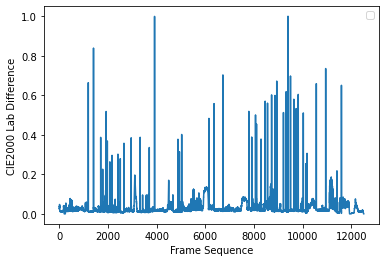

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER by taking only L values
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import time
from matplotlib import pyplot as plt
import numpy as np

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,Lab1.shape[0]):
    for j in range(0,Lab1.shape[1]):
      diff = diff + CIEDE2000((L1[i][j], 0, 0), (L2[i][j], 0, 0))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)





# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




In [ ]:
alpha = 2.081
cont = np.array(labdiff)
cont = cont/max(cont)

newx = np.mean(cont)
sig = np.std(cont)

T = newx + alpha * sig

ab_cut = []
#deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(cont[i] > T):
    ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)



395
[ 1331  1545  1840  1923  2045  2046  2056  2057  2059  2060  2064  2113
  2217  2307  2549  2646  2797  3093  3226  3228  3229  3230  3231  3232
  3233  3234  3235  3236  3237  3238  3239  3240  3241  3242  3243  3244
  3245  3246  3247  3248  3249  3250  3251  3252  3253  3254  3255  3256
  3257  3258  3259  3260  3261  3262  3263  3264  3265  3266  3267  3268
  3463  3837  4054  4627  4628  4629  4630  4631  4632  4633  4634  4635
  4636  4637  4638  4639  5016  5076  5169  5649  5653  5654  5656  5657
  5658  5659  5661  6083  6085  6086  6088  6094  6096  6097  6098  6099
  6105  6107  6108  6109  6110  6112  6114  6115  6116  6117  6118  6119
  6120  6121  6122  6123  6124  6125  6126  6127  6128  6129  6130  6131
  6132  6133  6134  6135  6136  6137  6138  6139  6140  6141  6142  6143
  6144  6145  6146  6147  6148  6149  6150  6151  6152  6153  6154  6155
  6156  6157  6158  6159  6160  6161  6162  6163  6164  6165  6166  6167
  6168  6169  6170  6171  6172  6173  6174  617

No handles with labels found to put in legend.


1.0
[0.0651073  0.0545278  0.06369678 ... 0.00248362 0.00236874 0.00270808]
0.24536468853428367
0.24969452558197947
0.21743047073540905


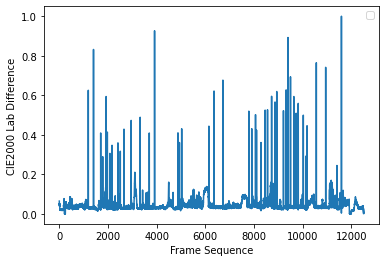

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
print(labdiff[11732]*3)
print(labdiff[11733]*3)
print(labdiff[11734]*3)



In [ ]:
ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
print(ab_cut[0])

46
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10277, 10321, 10702, 11086, 11549, 11734]
[ 1331  1545  1840  1923  2064  2113  2217  2307  2549  2646  2797  3093
  3463  3837  4054  5016  5076  5169  6288  6498  6863  7928  8047  8203
  8244  8429  8598  8696  8864  9004  9075  9351  9461  9538  9640  9777
  9872  9959 10167 10267 10277 10321 10702 11086 11549 11734]
1331


In [ ]:
#PRECISION AND RECALL and F1 score

import numpy as np

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)








['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '10267', '10277', '10321', '10702', '11086', '11549', '11734']
46
1331
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10277, 10321, 10702, 11086, 11549, 11734]
RECALL
1.0
PRECISION
1.0
F1 Score
1.0


In [ ]:
import cv2
import numpy as np
from skimage import color

k = 100
image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
image1 = np.float32(image1)
image1 *= 1./255
image2 = np.float32(image2)
image2 *= 1./255

Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
print(Lab1.shape)
Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


L1, a1, b1 = cv2.split(Lab1)
L2, a2, b2 = cv2.split(Lab2)

print(L1)

print(a1)

print(b1)

Ld1 = []
ad1 = []
bd1 = []
for i in range(0,image1.shape[0]):
  for j in range(0,image1.shape[1]):
    Ld1.append(L1[i][j])
    ad1.append(a1[i][j])
    bd1.append(b1[i][j])

Ld1 = np.array(Ld1)
ad1 = np.array(ad1)
bd1 = np.array(bd1)

mat = {}
mat['L'] = Ld1
mat['a'] = ad1
mat['b'] = bd1



#feat = np.stack((Ld1, ad1, bd1), axis = 1)

#print(feat)


(60, 88, 3)
[[16.247559 16.088867 15.39917  ... 21.704102 19.293213 16.314697]
 [21.643066 21.496582 21.21582  ... 21.447754 18.371582 15.319824]
 [24.627686 24.627686 24.993896 ... 23.21167  20.257568 16.827393]
 ...
 [26.727295 27.252197 28.4729   ... 24.932861 21.746826 18.31665 ]
 [26.531982 27.233887 28.692627 ... 24.932861 21.746826 18.676758]
 [26.78833  27.038574 28.692627 ... 24.42627  21.722412 18.97583 ]]
[[52.578125 52.3125   51.25     ... 55.5      48.75     45.125   ]
 [57.34375  56.234375 55.6875   ... 57.359375 50.484375 47.171875]
 [64.5      64.25     65.21875  ... 61.53125  55.       51.484375]
 ...
 [68.65625  69.609375 71.953125 ... 64.609375 58.5625   55.109375]
 [68.203125 69.796875 72.21875  ... 64.609375 58.5625   55.125   ]
 [68.265625 69.359375 72.21875  ... 64.5      58.828125 55.125   ]]
[[-71.125    -70.765625 -69.4375   ... -76.640625 -67.875    -62.890625]
 [-78.546875 -77.59375  -76.859375 ... -78.265625 -69.40625  -64.546875]
 [-87.203125 -87.203125 -8

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

#print(pd.DataFrame(mat))

feat = pd.DataFrame(mat)

print(feat)

X_std = StandardScaler().fit_transform(feat)

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
  print(i[0])

pca = sklearnPCA(n_components=1)

redfeat = pca.fit_transform(feat)
print(redfeat)
print(pca.explained_variance_ratio_)
 



              L          a          b
0     16.247559  52.578125 -71.125000
1     16.088867  52.312500 -70.765625
2     15.399170  51.250000 -69.437500
3     15.191650  50.375000 -68.531250
4     15.496826  50.312500 -68.656250
...         ...        ...        ...
5275  27.050781  69.546875 -93.046875
5276  26.013184  67.843750 -90.718750
5277  24.426270  64.500000 -86.359375
5278  21.722412  58.828125 -78.406250
5279  18.975830  55.125000 -73.312500

[5280 rows x 3 columns]
Covariance matrix n[[ 1.0001895  -0.55146587  0.5182214 ]
 [-0.55146587  1.0001895  -0.9868204 ]
 [ 0.5182214  -0.9868204   1.0001897 ]]
Eigenvectors n[[ 0.476299   -0.87863874  0.03366345]
 [-0.62506019 -0.31141397  0.71576609]
 [ 0.61841655  0.36196036  0.69752826]]
nEigenvalues n[2.39674086 0.59125028 0.01257715]
Eigenvalues in descending order:
2.3967408598019326
0.5912502788217086
0.012577149658470857
[[-28.887371]
 [-28.481886]
 [-26.958702]
 ...
 [-46.152744]
 [-37.137012]
 [-31.528479]]
[0.9172647]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

pca = sklearnPCA(n_components=1)

redfeat = pca.fit_transform(feat)
print(redfeat)
print(pca.explained_variance_ratio_)

[[-28.88725 ]
 [-28.481878]
 [-26.958694]
 ...
 [-46.15275 ]
 [-37.137012]
 [-31.528471]]
[0.9172649]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import seaborn

#print(pd.DataFrame(mat))

feat = pd.DataFrame(mat)

print(feat)


pca = sklearnPCA(n_components=1)

redfeat = pca.fit_transform(feat)
print(redfeat)
print(pca.explained_variance_ratio_)

print(redfeat[0][0])
print(redfeat.shape)

kmean=KMeans(n_clusters=100)
a = kmean.fit(redfeat)

print(a.cluster_centers_[0][0])


 



              L          a          b
0     16.247559  52.578125 -71.125000
1     16.088867  52.312500 -70.765625
2     15.399170  51.250000 -69.437500
3     15.191650  50.375000 -68.531250
4     15.496826  50.312500 -68.656250
...         ...        ...        ...
5275  27.050781  69.546875 -93.046875
5276  26.013184  67.843750 -90.718750
5277  24.426270  64.500000 -86.359375
5278  21.722412  58.828125 -78.406250
5279  18.975830  55.125000 -73.312500

[5280 rows x 3 columns]
[[-28.88728 ]
 [-28.481894]
 [-26.958708]
 ...
 [-46.152767]
 [-37.13703 ]
 [-31.52849 ]]
[0.91726565]
-28.88728
(5280, 1)
22.914175


Streaming output truncated to the last 5000 lines.
11261
0.2314276830937889
(60, 88, 3)
11261
11262
0.46930347296542424
(60, 88, 3)
11262
11263
0.45170107112382857
(60, 88, 3)
11263
11264
0.4685005363085084
(60, 88, 3)
11264
11265
0.45070464578865044
(60, 88, 3)
11265
11266
0.18953280018375845
(60, 88, 3)
11266
11267
0.48138106533969
(60, 88, 3)
11267
11268
0.4456216150255924
(60, 88, 3)
11268
11269
0.43974121134933003
(60, 88, 3)
11269
11270
0.45887320917125113
(60, 88, 3)
11270
11271
0.17963741670171818
(60, 88, 3)
11271
11272
0.41017767645274267
(60, 88, 3)
11272
11273
0.47426422497161663
(60, 88, 3)
11273
11274
0.44278503409694103
(60, 88, 3)
11274
11275
0.4439150255068598
(60, 88, 3)
11275
11276
0.21857416881003855
(60, 88, 3)
11276
11277
0.4071974272061786
(60, 88, 3)
11277
11278
0.374461710660704
(60, 88, 3)
11278
11279
0.40815464842511506
(60, 88, 3)
11279
11280
0.3729698895546815
(60, 88, 3)
11280
11281
0.1840518933840297
(60, 88, 3)
11281
11282
0.3507709108104519
(60, 88, 3)


No handles with labels found to put in legend.


86
[143, 331, 410, 420, 437, 473, 477, 761, 772, 792, 799, 801, 905, 1059, 1063, 1065, 1108, 1213, 1331, 1756, 1840, 2064, 2113, 2217, 2307, 2549, 2797, 3093, 3463, 3837, 4054, 4811, 5016, 5076, 5169, 5559, 5647, 5699, 5774, 6032, 6035, 6288, 6498, 6863, 7120, 7928, 8047, 8203, 8244, 8422, 8424, 8429, 8598, 8696, 8798, 8838, 8864, 8925, 9004, 9075, 9351, 9461, 9482, 9538, 9640, 9777, 9872, 9959, 10167, 10277, 10321, 10513, 10702, 10948, 10954, 10993, 10996, 11086, 11246, 11314, 11316, 11318, 11472, 11734, 11794, 12297]
[  143   331   410   420   437   473   477   761   772   792   799   801
   905  1059  1063  1065  1108  1213  1331  1756  1840  2064  2113  2217
  2307  2549  2797  3093  3463  3837  4054  4811  5016  5076  5169  5559
  5647  5699  5774  6032  6035  6288  6498  6863  7120  7928  8047  8203
  8244  8422  8424  8429  8598  8696  8798  8838  8864  8925  9004  9075
  9351  9461  9482  9538  9640  9777  9872  9959 10167 10277 10321 10513
 10702 10948 10954 10993 10996 11086 

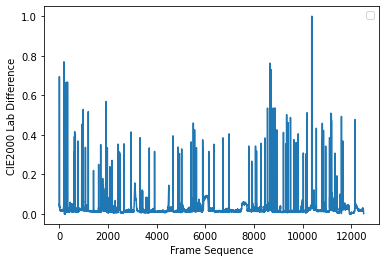

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 PCA Column wise(L a b)
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import seaborn
import time


def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00

# starting time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

  Ld1 = []
  ad1 = []
  bd1 = []
  for i in range(0,image1.shape[0]):
    for j in range(0,image1.shape[1]):
      Ld1.append(L1[i][j])
      ad1.append(a1[i][j])
      bd1.append(b1[i][j])

  Ld1 = np.array(Ld1)
  ad1 = np.array(ad1)
  bd1 = np.array(bd1)

  mat1 = {}
  mat1['L'] = Ld1
  mat1['a'] = ad1
  mat1['b'] = bd1

  Ld2 = []
  ad2 = []
  bd2 = []
  for i in range(0,image2.shape[0]):
    for j in range(0,image2.shape[1]):
      Ld2.append(L2[i][j])
      ad2.append(a2[i][j])
      bd2.append(b2[i][j])

  Ld2 = np.array(Ld2)
  ad2 = np.array(ad2)
  bd2 = np.array(bd2)

  mat2 = {}
  mat2['L'] = Ld2
  mat2['a'] = ad2
  mat2['b'] = bd2

#PCA for dimensionality reduction
  feat1 = pd.DataFrame(mat1)
  pca = sklearnPCA(n_components=1)
  redfeat1 = pca.fit_transform(feat1)

  
  feat2 = pd.DataFrame(mat2)
  pca = sklearnPCA(n_components=1)
  redfeat2 = pca.fit_transform(feat2)

#Kmeans for 100 key sample selection
  #kmean=KMeans(n_clusters=100)
  #f1 = kmean.fit(redfeat1)
  #f2 = kmean.fit(redfeat2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,redfeat1.shape[0]):
    diff = diff + CIEDE2000((redfeat1[i][0], 0, 0), (redfeat2[i][0], 0, 0))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))
# end time
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)





# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")



end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")





In [ ]:
alpha = 2.415
cont = np.array(labdiff)
cont = cont/max(cont)

newx = np.mean(cont)
sig = np.std(cont)

T = newx + alpha * sig

ab_cut = []
#deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(cont[i] > T):
    ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)



201
[  143   331   404   405   407   408   410   412   413   414   415   420
   422   423   424   425   426   432   433   437   439   440   441   443
   444   445   446   449   450   452   453   456   457   473   477   745
   746   747   761   772   792   796   797   799   801   901   902   903
   905  1059  1063  1065  1067  1068  1071  1072  1077  1078  1081  1082
  1084  1085  1087  1088  1093  1094  1108  1110  1111  1113  1114  1115
  1116  1122  1123  1213  1331  1545  1756  1840  1923  2059  2064  2113
  2217  2307  2549  2556  2557  2559  2560  2570  2571  2573  2574  2584
  2585  2595  2596  2598  2599  2609  2610  2612  2613  2623  2624  2634
  2635  2637  2638  2646  2797  3093  3463  3837  4054  4811  5016  5076
  5169  5555  5556  5559  5647  5699  5774  6032  6035  6039  6040  6288
  6498  6863  7120  7928  8047  8203  8244  8422  8424  8429  8598  8696
  8798  8838  8841  8842  8844  8845  8846  8847  8864  8925  9004  9075
  9351  9461  9482  9538  9640  9777  9872  995

No handles with labels found to put in legend.


1.0
[0.04838984 0.04362425 0.05468031 ... 0.00186615 0.0015914  0.0015744 ]
0.16456219050893856
0.16009174675109095
0.1406379815822441


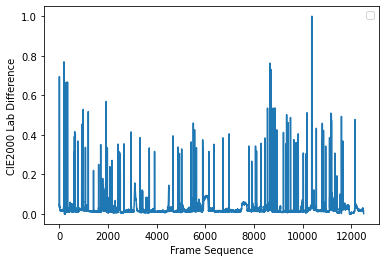

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
print(labdiff[11732]*3)
print(labdiff[11733]*3)
print(labdiff[11734]*3)


In [ ]:
ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#np.savetxt('/content/ab_cut_pca.txt', ab_cut, fmt='%s', delimiter=' ')


86
[  143   331   410   420   437   473   477   761   772   792   799   801
   905  1059  1063  1065  1108  1213  1331  1756  1840  2064  2113  2217
  2307  2549  2797  3093  3463  3837  4054  4811  5016  5076  5169  5559
  5647  5699  5774  6032  6035  6288  6498  6863  7120  7928  8047  8203
  8244  8422  8424  8429  8598  8696  8798  8838  8864  8925  9004  9075
  9351  9461  9482  9538  9640  9777  9872  9959 10167 10277 10321 10513
 10702 10948 10954 10993 10996 11086 11246 11314 11316 11318 11472 11734
 11794 12297]


In [ ]:
#PRECISION AND RECALL and F1 score

import numpy as np

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cutT:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cutT)):
  num = ab_cutT[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)








['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '10267', '10277', '10321', '10702', '11086', '11549', '11734']
46
1331
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10277, 10321, 10702, 11086, 11549, 11734]
RECALL
1.0
PRECISION
0.3607843137254902
F1 Score
0.5302593659942363


In [ ]:
#OPENCV VERSION FOR USING SIFT
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17


     |████████████████████████████████| 25.0MB 170kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


     |████████████████████████████████| 30.6MB 153kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import numpy as np

sl = []
with open("/content/ab_cut_pca.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
sl = np.array(sl)
print(sl[0])

['143', '331', '410', '420', '437', '473', '477', '761', '772', '792', '799', '801', '905', '1059', '1063', '1065', '1108', '1213', '1331', '1756', '1840', '2064', '2113', '2217', '2307', '2549', '2797', '3093', '3463', '3837', '4054', '4811', '5016', '5076', '5169', '5559', '5647', '5699', '5774', '6032', '6035', '6288', '6498', '6863', '7120', '7928', '8047', '8203', '8244', '8422', '8424', '8429', '8598', '8696', '8798', '8838', '8864', '8925', '9004', '9075', '9351', '9461', '9482', '9538', '9640', '9777', '9872', '9959', '10167', '10277', '10321', '10513', '10702', '10948', '10954', '10993', '10996', '11086', '11246', '11314', '11316', '11318', '11472', '11734', '11794', '12297']
143


In [ ]:
import cv2
parameter = []
cut = []
for i in range(0,len(sl)):

  image1 = cv2.imread("/content/video_frames/frame_"+ str(sl[i]) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(int(sl[i])-1) + ".jpg")

  img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

                    #sift
  sift = cv2.xfeatures2d.SIFT_create()

  keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
  keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

  matches = bf.match(descriptors_1,descriptors_2)

  print(sl[i])
  print(len(matches)/len(keypoints_2))
  parameter.append(len(matches)/len(keypoints_2))
  cut.append(sl[i])
parameter = np.array(parameter)
parameter = parameter/max(parameter)
print(cut)
print(parameter)


143
0.8536585365853658
331
0.45454545454545453
410
0.5833333333333334
420
0.6956521739130435
437
0.6190476190476191
473
0.65
477
0.64
761
0.8
772
0.75
792
0.5217391304347826
799
0.8095238095238095
801
0.75
905
0.8333333333333334
1059
0.0
1063
1.0
1065
1.0
1108
0.7222222222222222
1213
0.8076923076923077
1331
0.84
1756
0.9111111111111111
1840
0.8333333333333334
2064
0.875
2113
0.8823529411764706
2217
0.8695652173913043
2307
0.8260869565217391
2549
0.9
2797
0.7419354838709677
3093
0.5625
3463
0.7647058823529411
3837
0.8181818181818182
4054
0.8888888888888888
4811
1.0
5016
0.6363636363636364
5076
0.6470588235294118
5169
0.84375
5559
0.7391304347826086
5647
0.8333333333333334
5699
0.6857142857142857
5774
0.7058823529411765
6032
0.7560975609756098
6035
0.6964285714285714
6288
0.7435897435897436
6498
0.8461538461538461
6863
0.8444444444444444
7120
0.9148936170212766
7928
0.8703703703703703
8047
0.7288135593220338
8203
0.7692307692307693
8244
0.7894736842105263
8422
0.7878787878787878
8424
0.7

No handles with labels found to put in legend.


1.0
['143', '331', '410', '420', '437', '473', '477', '761', '772', '792', '799', '801', '905', '1059', '1063', '1065', '1108', '1213', '1331', '1756', '1840', '2064', '2113', '2217', '2307', '2549', '2797', '3093', '3463', '3837', '4054', '4811', '5016', '5076', '5169', '5559', '5647', '5699', '5774', '6032', '6035', '6288', '6498', '6863', '7120', '7928', '8047', '8203', '8244', '8422', '8424', '8429', '8598', '8696', '8798', '8838', '8864', '8925', '9004', '9075', '9351', '9461', '9482', '9538', '9640', '9777', '9872', '9959', '10167', '10277', '10321', '10513', '10702', '10948', '10954', '10993', '10996', '11086', '11246', '11314', '11316', '11318', '11472', '11734', '11794', '12297']
[0.85365854 0.45454545 0.58333333 0.69565217 0.61904762 0.65
 0.64       0.8        0.75       0.52173913 0.80952381 0.75
 0.83333333 0.         1.         1.         0.72222222 0.80769231
 0.84       0.91111111 0.83333333 0.875      0.88235294 0.86956522
 0.82608696 0.9        0.74193548 0.5625     0

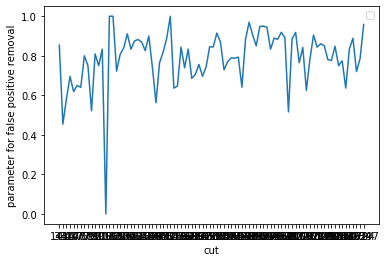

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(cut)
labdiff = np.array(parameter)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(cut)
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("cut")
plt.ylabel("parameter for false positive removal")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)


In [ ]:
import numpy as np

sl = []
with open("/content/labdiff.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
sl = np.array(sl)
print(sl)

cont = []
for i in range(0,len(sl)):
  cont.append(np.float(sl[i]))

print(cont)

alpha = 4
cont = np.array(cont)
cont = cont/max(cont)

newx = np.mean(cont)
sig = np.std(cont)

T = newx + alpha * sig

ab_cut = []
#deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(cont[i] > T):
    ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)


print(cont)


['0.06510729704554392', '0.05452780434523195', '0.06369678151249455', '0.06369537280221586', '0.04851772913275772', '0.04910617769200313', '0.05458984129831314', '0.04562829222209276', '0.04617028287725509', '0.04980711450209778', '0.039167401749665785', '0.052758088018477554', '0.048757406299336364', '0.04094176203085411', '0.045301581628162634', '0.048436923831334494', '0.039504361999619514', '0.03858090011994221', '0.04368491831513167', '0.03161705085802425', '0.035170886461765034', '0.032591724993299764', '0.02294582124123264', '0.02482490255157839', '0.025810447762792947', '0.021294928840536395', '0.02307922938349433', '0.024465237083954226', '0.02414534474857402', '0.025020949155009412', '0.024644338364759752', '0.02315905001478969', '0.024766834553041496', '0.021890205698547646', '0.018667381833172736', '0.021049294100447206', '0.02465915719576339', '0.021477013747870654', '0.021844131720364913', '0.025040223398154555', '0.02240311363336539', '0.021112328722216307', '0.022662579

In [ ]:
#PRECISION AND RECALL and F1 score

import numpy as np

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cutT:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cutT)):
  num = ab_cutT[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)








['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '10267', '10277', '10321', '10702', '11086', '11549', '11734']
46
1331
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10277, 10321, 10702, 11086, 11549, 11734]
RECALL
0.9662921348314607
PRECISION
0.3722943722943723
F1 Score
0.5375


In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define array
A = array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])
print(A)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


In [ ]:
import cv2
import numpy as np
from skimage import color
from sklearn.decomposition import TruncatedSVD

k = 100
image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
image1 = np.float32(image1)
image1 *= 1./255
image2 = np.float32(image2)
image2 *= 1./255

Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
print(Lab1.shape)
Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


L1, a1, b1 = cv2.split(Lab1)
L2, a2, b2 = cv2.split(Lab2)

print(L1)

print(a1)

print(b1)

Ld1 = []
ad1 = []
bd1 = []
for i in range(0,image1.shape[0]):
  for j in range(0,image1.shape[1]):
    Ld1.append(L1[i][j])
    ad1.append(a1[i][j])
    bd1.append(b1[i][j])

Ld1 = np.array(Ld1)
ad1 = np.array(ad1)
bd1 = np.array(bd1)

mat = {}
mat['L'] = Ld1
mat['a'] = ad1
mat['b'] = bd1

print(mat)

svd = TruncatedSVD(n_components=1)
#svd.fit(mat)
#result = svd.transform(mat)
#print(result)




feat = np.stack((Ld1, ad1, bd1), axis = 1)

#print(feat)
svd = TruncatedSVD(n_components=1)
svd.fit(feat)
result = svd.transform(feat)
#print(result)



(60, 88, 3)
[[16.247559 16.088867 15.39917  ... 21.704102 19.293213 16.314697]
 [21.643066 21.496582 21.21582  ... 21.447754 18.371582 15.319824]
 [24.627686 24.627686 24.993896 ... 23.21167  20.257568 16.827393]
 ...
 [26.727295 27.252197 28.4729   ... 24.932861 21.746826 18.31665 ]
 [26.531982 27.233887 28.692627 ... 24.932861 21.746826 18.676758]
 [26.78833  27.038574 28.692627 ... 24.42627  21.722412 18.97583 ]]
[[52.578125 52.3125   51.25     ... 55.5      48.75     45.125   ]
 [57.34375  56.234375 55.6875   ... 57.359375 50.484375 47.171875]
 [64.5      64.25     65.21875  ... 61.53125  55.       51.484375]
 ...
 [68.65625  69.609375 71.953125 ... 64.609375 58.5625   55.109375]
 [68.203125 69.796875 72.21875  ... 64.609375 58.5625   55.125   ]
 [68.265625 69.359375 72.21875  ... 64.5      58.828125 55.125   ]]
[[-71.125    -70.765625 -69.4375   ... -76.640625 -67.875    -62.890625]
 [-78.546875 -77.59375  -76.859375 ... -78.265625 -69.40625  -64.546875]
 [-87.203125 -87.203125 -8

Streaming output truncated to the last 5000 lines.
11259
11260
0.011092967795743034
(60, 88, 3)
11260
11261
0.010556333459308431
(60, 88, 3)
11261
11262
0.013562063827808446
(60, 88, 3)
11262
11263
0.016679969753424544
(60, 88, 3)
11263
11264
0.015874431123819744
(60, 88, 3)
11264
11265
0.016467912993199493
(60, 88, 3)
11265
11266
0.009346938953277527
(60, 88, 3)
11266
11267
0.01129849571789707
(60, 88, 3)
11267
11268
0.01155576792919862
(60, 88, 3)
11268
11269
0.015849678033106378
(60, 88, 3)
11269
11270
0.01958520951231262
(60, 88, 3)
11270
11271
0.0067888574322841795
(60, 88, 3)
11271
11272
0.011500730534206709
(60, 88, 3)
11272
11273
0.018228778920272293
(60, 88, 3)
11273
11274
0.018761398481974518
(60, 88, 3)
11274
11275
0.020525352442542426
(60, 88, 3)
11275
11276
0.013459433536737531
(60, 88, 3)
11276
11277
0.02140445475485117
(60, 88, 3)
11277
11278
0.02455383030363186
(60, 88, 3)
11278
11279
0.021274514510724627
(60, 88, 3)
11279
11280
0.014696015636323
(60, 88, 3)
11280
11281

No handles with labels found to put in legend.


12509
12510
0.001569854818848623
1.0
[0.07400543 0.06560241 0.09497174 ... 0.00205935 0.00190755 0.00191554]
24
[1545, 2549, 4054, 4644, 6288, 6498, 6863, 7928, 8203, 8244, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9959, 10702, 11086, 11734]
[ 1545  2549  4054  4644  6288  6498  6863  7928  8203  8244  8598  8696
  8864  9004  9075  9351  9461  9538  9640  9777  9959 10702 11086 11734]
['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '10267', '10277', '10321', '10702', '11086', '11549', '11734']
46
1331
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 964

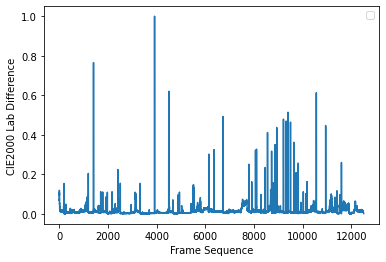

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER WITH SVD
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import seaborn
import time


def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00

# starting time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

  Ld1 = []
  ad1 = []
  bd1 = []
  for i in range(0,image1.shape[0]):
    for j in range(0,image1.shape[1]):
      Ld1.append(L1[i][j])
      ad1.append(a1[i][j])
      bd1.append(b1[i][j])

  Ld1 = np.array(Ld1)
  ad1 = np.array(ad1)
  bd1 = np.array(bd1)

  mat1 = {}
  mat1['L'] = Ld1
  mat1['a'] = ad1
  mat1['b'] = bd1

  Ld2 = []
  ad2 = []
  bd2 = []
  for i in range(0,image2.shape[0]):
    for j in range(0,image2.shape[1]):
      Ld2.append(L2[i][j])
      ad2.append(a2[i][j])
      bd2.append(b2[i][j])

  Ld2 = np.array(Ld2)
  ad2 = np.array(ad2)
  bd2 = np.array(bd2)

  mat2 = {}
  mat2['L'] = Ld2
  mat2['a'] = ad2
  mat2['b'] = bd2

#SVD for dimensionality reduction
  feat1 = np.stack((Ld1, ad1, bd1), axis = 1)
  feat2 = np.stack((Ld2, ad2, bd2), axis = 1)

  svd = TruncatedSVD(n_components=1)
  svd.fit(feat1)
  redfeat1 = svd.transform(feat1)

  svd = TruncatedSVD(n_components=1)
  svd.fit(feat2)
  redfeat2 = svd.transform(feat2)

#Kmeans for 100 key sample selection
  #kmean=KMeans(n_clusters=100)
  #f1 = kmean.fit(redfeat1)
  #f2 = kmean.fit(redfeat2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,(np.int(redfeat1.shape[0])- 5000)):
    diff = diff + CIEDE2000((redfeat1[i][0], 0, 0), (redfeat2[i][0], 0, 0))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))
# end time
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)



end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")





In [ ]:
ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)


24
[1545, 2549, 4054, 4644, 6288, 6498, 6863, 7928, 8203, 8244, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9959, 10702, 11086, 11734]
[ 1545  2549  4054  4644  6288  6498  6863  7928  8203  8244  8598  8696
  8864  9004  9075  9351  9461  9538  9640  9777  9959 10702 11086 11734]
['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '10267', '10277', '10321', '10702', '11086', '11549', '11734']
46
1331
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10277, 10321, 10702, 11086, 11549, 11734]
RECALL
0.6666666666666666
PRECIS

In [ ]:
ab_cut = []
alpha = 4.5
cont = np.array(labdiff)
cont = cont/max(cont)

newx = np.mean(cont)
sig = np.std(cont)

T = newx + alpha * sig

ab_cut = []
#deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(cont[i] > T):
    ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)


print(cont)

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)


50
[  334  1331  1545  2549  2646  3463  4054  4635  4637  4638  4639  4643
  4644  5647  5648  5649  5651  5652  5653  5654  5656  5657  5658  5659
  6288  6498  6863  7928  8047  8203  8244  8598  8696  8864  8925  9004
  9075  9351  9461  9482  9483  9538  9640  9777  9872  9959 10321 10702
 11086 11734]
[0.07400543 0.06560241 0.09497174 ... 0.00205935 0.00190755 0.00191554]
['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '10267', '10277', '10321', '10702', '11086', '11549', '11734']
46
1331
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167

No handles with labels found to put in legend.


1.0
[0.07567845 0.07179465 0.09891936 ... 0.00150191 0.00139163 0.00160259]
0.19822993181402848
0.19661351230253396
0.17359159061964358


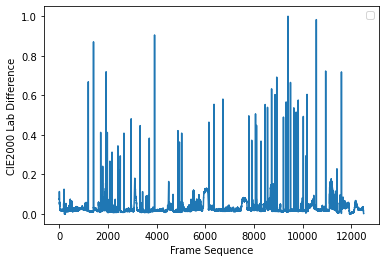

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
print(labdiff[11732]*3)
print(labdiff[11733]*3)
print(labdiff[11734]*3)


In [ ]:
ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)


50
[ 1331  1545  1840  1923  2064  2113  2217  2307  2549  2559  2570  2609
  2646  2797  3093  3463  3837  4054  5016  5076  5169  6288  6498  6863
  7928  8047  8203  8244  8429  8598  8696  8864  9004  9075  9351  9461
  9482  9538  9640  9777  9872  9959 10167 10267 10277 10321 10702 11086
 11549 11734]


In [ ]:
#PRECISION AND RECALL and F1 score

import numpy as np

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)








['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '10267', '10277', '10321', '10702', '11086', '11549', '11734']
46
1331
[1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 5016, 5076, 5169, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10277, 10321, 10702, 11086, 11549, 11734]
RECALL
1.0
PRECISION
0.9583333333333334
F1 Score
0.9787234042553191


In [ ]:
#CIEDE2000 frame sequence difference 20/03/2021 APPLYING PCA ROW WISE
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import seaborn
import time


def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00

# starting time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

  L1 = np.array(L1)
  L1.flatten
  

  a1 = np.array(a1)
  a1.flatten

  b1 = np.array(b1)
  b1.flatten

  

  
#PCA for dimensionality reduction
  #PCA for dimensionality reduction
  feat1 = pd.DataFrame(mat1)
  pca = sklearnPCA(n_components=1)
  redfeat1 = pca.fit_transform(feat1)

  
  feat2 = pd.DataFrame(mat2)
  pca = sklearnPCA(n_components=1)
  redfeat2 = pca.fit_transform(feat2)


#Kmeans for 100 key sample selection
  #kmean=KMeans(n_clusters=100)
  #f1 = kmean.fit(redfeat1)
  #f2 = kmean.fit(redfeat2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,redfeat1.shape[0]):
    diff = diff + CIEDE2000((redfeat1[i][0], 0, 0), (redfeat2[i][0], 0, 0))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")





In [ ]:
import cv2
import numpy as np
from skimage import color
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA as sklearnPCA

k = 100
image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
image1 = np.float32(image1)
image1 *= 1./255
image2 = np.float32(image2)
image2 *= 1./255

Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
print(Lab1.shape)
Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


L1, a1, b1 = cv2.split(Lab1)
L2, a2, b2 = cv2.split(Lab2)

Ld1 = []
ad1 = []
bd1 = []
for i in range(0,image1.shape[0]):
  for j in range(0,image1.shape[1]):
    Ld1.append(L1[i][j])
    ad1.append(a1[i][j])
    bd1.append(b1[i][j])

Ld1 = np.array(Ld1)
ad1 = np.array(ad1)
bd1 = np.array(bd1)

mat1 = {}
mat1['L'] = Ld1
mat1['a'] = ad1
mat1['b'] = bd1

Ld2 = []
ad2 = []
bd2 = []
for i in range(0,image2.shape[0]):
  for j in range(0,image2.shape[1]):
    Ld2.append(L2[i][j])
    ad2.append(a2[i][j])
    bd2.append(b2[i][j])

Ld2 = np.array(Ld2)
ad2 = np.array(ad2)
bd2 = np.array(bd2)

mat2 = {}
mat2['L'] = Ld2
mat2['a'] = ad2
mat2['b'] = bd2

#PCA for dimensionality reduction
feat1 = pd.DataFrame(mat1)
pca = sklearnPCA(n_components=1)
redfeat1 = pca.fit_transform(feat1)

  
feat2 = pd.DataFrame(mat2)
pca = sklearnPCA(n_components=1)
redfeat2 = pca.fit_transform(feat2)

print(redfeat1.shape)

pca = sklearnPCA(n_components=20)

#pcar = pca.fit_transform(redfeat1)


#print(result)



(60, 88, 3)
(5280, 1)


ValueError: ignored

Streaming output truncated to the last 5000 lines.
11258
11259
0.14973551713401273
(60, 88, 3)
11259
11260
0.1314829951003157
(60, 88, 3)
11260
11261
0.08646513172658948
(60, 88, 3)
11261
11262
0.12844386123203883
(60, 88, 3)
11262
11263
0.11767973499753388
(60, 88, 3)
11263
11264
0.1139408429101493
(60, 88, 3)
11264
11265
0.11757086539263073
(60, 88, 3)
11265
11266
0.0684590773817853
(60, 88, 3)
11266
11267
0.13258948397790732
(60, 88, 3)
11267
11268
0.10933013079131035
(60, 88, 3)
11268
11269
0.10821837072289266
(60, 88, 3)
11269
11270
0.1340354619726625
(60, 88, 3)
11270
11271
0.05922392360549192
(60, 88, 3)
11271
11272
0.10179013929221857
(60, 88, 3)
11272
11273
0.12378366258720763
(60, 88, 3)
11273
11274
0.10372489997421545
(60, 88, 3)
11274
11275
0.10681037096077556
(60, 88, 3)
11275
11276
0.07970734201739103
(60, 88, 3)
11276
11277
0.10725513609961426
(60, 88, 3)
11277
11278
0.09363973614012547
(60, 88, 3)
11278
11279
0.12226959232505379
(60, 88, 3)
11279
11280
0.090847041281792

No handles with labels found to put in legend.


12508
12509
0.012310422873358122
(60, 88, 3)
12509
12510
0.010210486955557941
1.0
[0.0512144  0.04573144 0.05325992 ... 0.00352587 0.00249206 0.00206696]
86
[  143   331   410   420   437   473   477   761   772   792   799   801
   905  1059  1063  1065  1108  1213  1331  1545  1840  1851  1859  1923
  2064  2113  2549  2646  2797  3093  3463  3837  4054  4811  5076  5169
  5559  5647  5699  5774  6032  6035  6288  6498  6863  7120  7928  8203
  8244  8422  8424  8598  8696  8798  8838  8864  8925  9004  9075  9351
  9482  9538  9640  9777  9872  9959 10167 10267 10277 10321 10513 10702
 10948 10954 10993 10996 11086 11246 11314 11316 11318 11472 11544 11734
 11794 12297]
['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '2797', '3093', '3463', '3837', '4054', '5016', '5076', '5169', '6288', '6498', '6863', '7928', '8047', '8203', '8244', '8429', '8598', '8696', '8864', '9004', '9075', '9351', '9461', '9538', '9640', '9777', '9872', '9959', '10167', '102

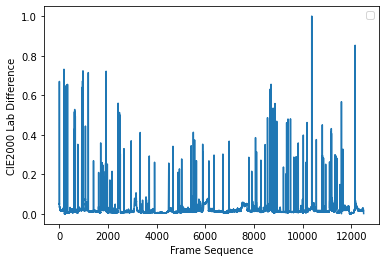

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import seaborn
import time


def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00

# starting time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

  Ld1 = []
  ad1 = []
  bd1 = []
  for i in range(0,image1.shape[0]):
    for j in range(0,image1.shape[1]):
      Ld1.append(L1[i][j])
      ad1.append(a1[i][j])
      bd1.append(b1[i][j])

  Ld1 = np.array(Ld1)
  ad1 = np.array(ad1)
  bd1 = np.array(bd1)

  mat1 = {}
  mat1['L'] = Ld1
  mat1['a'] = ad1
  mat1['b'] = bd1

  Ld2 = []
  ad2 = []
  bd2 = []
  for i in range(0,image2.shape[0]):
    for j in range(0,image2.shape[1]):
      Ld2.append(L2[i][j])
      ad2.append(a2[i][j])
      bd2.append(b2[i][j])

  Ld2 = np.array(Ld2)
  ad2 = np.array(ad2)
  bd2 = np.array(bd2)

  mat2 = {}
  mat2['L'] = Ld2
  mat2['a'] = ad2
  mat2['b'] = bd2

#PCA for dimensionality reduction
  feat1 = pd.DataFrame(mat1)
  pca = sklearnPCA(n_components=1)
  redfeat1 = pca.fit_transform(feat1)

  
  feat2 = pd.DataFrame(mat2)
  pca = sklearnPCA(n_components=1)
  redfeat2 = pca.fit_transform(feat2)

#Kmeans for 100 key sample selection
  #kmean=KMeans(n_clusters=100)
  #f1 = kmean.fit(redfeat1)
  #f2 = kmean.fit(redfeat2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0, (np.int(redfeat1.shape[0]) - 3000)):
    diff = diff + CIEDE2000((redfeat1[i][0], 0, 0), (redfeat2[i][0], 0, 0))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))
# end time
from matplotlib import pyplot as plt
import numpy as np

#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)


#PRECISION AND RECALL and F1 score

#import numpy as np

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)











end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")





In [ ]:
import cv2
import numpy as np
from skimage import color
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA as sklearnPCA


import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

k = 100
image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
image1 = np.float32(image1)
image1 *= 1./255
image2 = np.float32(image2)
image2 *= 1./255

Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
print(Lab1.shape)
Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


L1, a1, b1 = cv2.split(Lab1)
L2, a2, b2 = cv2.split(Lab2)

Ld1 = []
ad1 = []
bd1 = []
for i in range(0,image1.shape[0]):
  for j in range(0,image1.shape[1]):
    Ld1.append(L1[i][j])
    ad1.append(a1[i][j])
    bd1.append(b1[i][j])

Ld1 = np.array(Ld1)
ad1 = np.array(ad1)
bd1 = np.array(bd1)

mat1 = {}
mat1['L'] = Ld1
mat1['a'] = ad1
mat1['b'] = bd1

Ld2 = []
ad2 = []
bd2 = []
for i in range(0,image2.shape[0]):
  for j in range(0,image2.shape[1]):
    Ld2.append(L2[i][j])
    ad2.append(a2[i][j])
    bd2.append(b2[i][j])

Ld2 = np.array(Ld2)
ad2 = np.array(ad2)
bd2 = np.array(bd2)

mat2 = {}
mat2['0'] = Ld2
mat2['1'] = ad2
mat2['2'] = bd2

#PCA for dimensionality reduction
feat1 = pd.DataFrame(mat1)
print(feat1)

feat1t = feat1.T
print(feat1t)

feat1ta = feat1t.to_numpy()
print(feat1ta)

print(feat1ta.shape)

df = pd.DataFrame(feat1ta)
print(df)
X = df

matred = PCA(X,50)
print(matred)






  
#feat2 = pd.DataFrame(mat2)
#pca = sklearnPCA(n_components=1)
#redfeat2 = pca.fit_transform(feat2)


(60, 88, 3)
              L          a          b
0     16.247559  52.578125 -71.125000
1     16.088867  52.312500 -70.765625
2     15.399170  51.250000 -69.437500
3     15.191650  50.375000 -68.531250
4     15.496826  50.312500 -68.656250
...         ...        ...        ...
5275  27.050781  69.546875 -93.046875
5276  26.013184  67.843750 -90.718750
5277  24.426270  64.500000 -86.359375
5278  21.722412  58.828125 -78.406250
5279  18.975830  55.125000 -73.312500

[5280 rows x 3 columns]
        0          1         2     ...       5277       5278      5279
L  16.247559  16.088867  15.39917  ...  24.426270  21.722412  18.97583
a  52.578125  52.312500  51.25000  ...  64.500000  58.828125  55.12500
b -71.125000 -70.765625 -69.43750  ... -86.359375 -78.406250 -73.31250

[3 rows x 5280 columns]
[[ 16.247559  16.088867  15.39917  ...  24.42627   21.722412  18.97583 ]
 [ 52.578125  52.3125    51.25     ...  64.5       58.828125  55.125   ]
 [-71.125    -70.765625 -69.4375   ... -86.359375 -7

In [ ]:
print(np.mean(X , axis = 1))
X_meaned = X - np.mean(X , axis = 0)

print(X_meaned)

cov_mat = np.cov(X_meaned , rowvar = False)
print(cov_mat)

eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 50 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

print(X_reduced.shape)
print(X_reduced)


In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import seaborn
import time

def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced




def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00

# starting time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

# FEATURE VECTOR OF FRAME i
  Ld1 = []
  ad1 = []
  bd1 = []
  for i in range(0,image1.shape[0]):
    for j in range(0,image1.shape[1]):
      Ld1.append(L1[i][j])
      ad1.append(a1[i][j])
      bd1.append(b1[i][j])

  Ld1 = np.array(Ld1)
  ad1 = np.array(ad1)
  bd1 = np.array(bd1)

  mat1 = {}
  mat1['L'] = Ld1
  mat1['a'] = ad1
  mat1['b'] = bd1

  feat1 = pd.DataFrame(mat1)
  #print(feat1)

  feat1t = feat1.T
  #print(feat1t)

  feat1ta = feat1t.to_numpy()
  #print(feat1ta)

  #print(feat1ta.shape)

  df = pd.DataFrame(feat1ta)
  #print(df)
  X = df

  matred1 = PCA(X,50)





# FEATURE VECTOR OF FRAME i+1

  Ld2 = []
  ad2 = []
  bd2 = []
  for i in range(0,image2.shape[0]):
    for j in range(0,image2.shape[1]):
      Ld2.append(L2[i][j])
      ad2.append(a2[i][j])
      bd2.append(b2[i][j])

  Ld2 = np.array(Ld2)
  ad2 = np.array(ad2)
  bd2 = np.array(bd2)

  mat2 = {}
  mat2['L'] = Ld2
  mat2['a'] = ad2
  mat2['b'] = bd2

  feat1 = pd.DataFrame(mat2)
  #print(feat1)

  feat1t = feat1.T
  #print(feat1t)

  feat1ta = feat1t.to_numpy()
  #print(feat1ta)

  #print(feat1ta.shape)

  df = pd.DataFrame(feat1ta)
  #print(df)
  X = df

  matred2 = PCA(X,50)

#PCA for dimensionality reduction
  

#Kmeans for 100 key sample selection
  #kmean=KMeans(n_clusters=100)
  #f1 = kmean.fit(redfeat1)
  #f2 = kmean.fit(redfeat2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0, matred1.shape[1]):
    diff = diff + CIEDE2000((matred1[0][i], matred1[1][i], matred1[2][i]), (matred2[0][i], matred2[1][i], matred2[2][i]))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))
# end time
from matplotlib import pyplot as plt
import numpy as np

#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)


#PRECISION AND RECALL and F1 score

#import numpy as np

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)











end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")





(60, 88, 3)
1
2
0.03022186541121513
(60, 88, 3)
2
3
0.0013433436183179755
(60, 88, 3)
3
4
0.0012851125613433183
(60, 88, 3)
4
5
0.0010382724960347645
(60, 88, 3)
5
6
0.0008778022635456342
(60, 88, 3)


KeyboardInterrupt: ignored